In [38]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

redwine_train = np.loadtxt('redwine_training.txt')[:,:-1]
redwine_trainlabels = np.loadtxt('redwine_training.txt')[:,-1]
redwine_test = np.loadtxt('redwine_testing.txt')[:,:-1]
redwine_testlabels = np.loadtxt('redwine_testing.txt')[:,-1]

In [39]:
#Exercise 2
def multivarlinreg(x,y):
    z = np.ones((x.shape[0],1))
    x = np.column_stack((z,x))
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x),x)),np.transpose(x)),y)

print("Weights of the regression model using only the first feature:\n" + str(multivarlinreg(redwine_train[:,0],redwine_trainlabels)))
print("Weights of the regression model using all 11 features:\n" + str(multivarlinreg(redwine_train, redwine_trainlabels)))

Weights of the regression model using only the first feature:
[ 5.2057261   0.05035934]
Weights of the regression model using all 11 features:
[  5.16573717e+01   1.95852727e-02  -1.06193618e+00   2.58896285e-02
   5.02281634e-02  -2.75489463e+00   5.65346092e-03  -3.80728880e-03
  -4.72092423e+01  -4.26639379e-01   8.50478130e-01   2.37895900e-01]


In [40]:
#Exercise 3
def rmse(t, y):
    return np.sqrt(np.mean(np.abs(y - t) ** 2))

x = redwine_train[:,0]
w = multivarlinreg(x,redwine_trainlabels)
f = redwine_test[:,0]
z = np.ones((f.shape[0],1))
f = np.column_stack((z,f))
t = np.matmul(f,w)

print("RMSE of the regression model with 1 feature: " + str(rmse(t, redwine_testlabels)))

x = redwine_train
w = multivarlinreg(x,redwine_trainlabels)
f = redwine_test
z = np.ones((f.shape[0],1))
f = np.column_stack((z,f))
t = np.matmul(f,w)

print("RMSE of the regression model with all features: " + str(rmse(t, redwine_testlabels)))

RMSE of the regression model with 1 feature: 0.786089275416
RMSE of the regression model with all features: 0.644717277311


In [41]:
#Exercise 5
from sklearn.ensemble import RandomForestClassifier

weed_train = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
weed_test = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')
weed_traindata = weed_train[:,:-1]
weed_trainlabels = weed_train[:,-1]
weed_testdata = weed_test[:,:-1]
weed_testlabels = weed_test[:,-1]

In [42]:
classifier = RandomForestClassifier(n_jobs=50, random_state=0)
classifier.fit(weed_traindata, weed_trainlabels)

#classifier.predict(weed_traindata)

#Calculating accuracy
def classification_error(prediction, labels):
    if len(prediction) != len(labels):
        print("Prediction and labels should have the same dimension.")
        return 0
        
    acc = 0
    for i in range(len(prediction)):
        if prediction[i] == labels[i]:
            acc+=1
    return acc/len(prediction)

print("Train accuracy: " + str(classification_error(classifier.predict(weed_traindata), weed_trainlabels)))
print("Test accuracy: " + str(classification_error(classifier.predict(weed_testdata), weed_testlabels)))

Train accuracy: 0.999
Test accuracy: 0.975609756097561


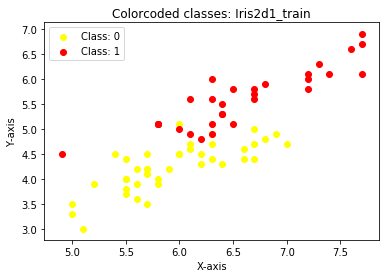

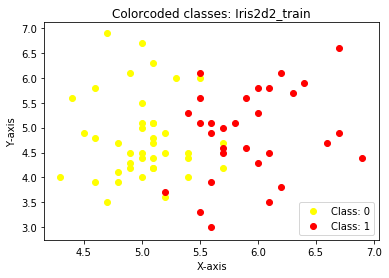

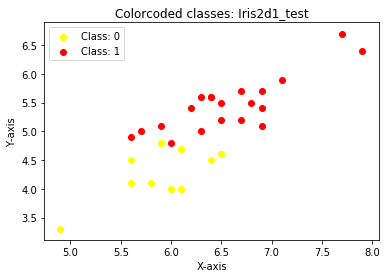

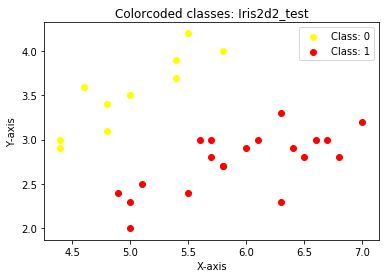

In [43]:
#Exercise 7
iris2d1_train = np.loadtxt('Iris2D1_train.txt')
iris2d1_trainlabels = iris2d1_train[:,2]
iris2d2_train = np.loadtxt('Iris2D2_train.txt')
iris2d2_trainlabels = iris2d2_train[:,2]
iris2d1_test = np.loadtxt('Iris2D1_test.txt')
iris2d1_testlabels = iris2d1_test[:,2]
iris2d2_test = np.loadtxt('Iris2D2_test.txt')
iris2d2_testlabels = iris2d2_test[:,2]

plt.scatter(iris2d1_train[:,0][iris2d1_trainlabels==0], iris2d1_train[:,1][iris2d1_trainlabels==0], c="yellow", label="Class: " + str(0))
plt.scatter(iris2d1_train[:,0][iris2d1_trainlabels==1], iris2d1_train[:,1][iris2d1_trainlabels==1], c="red", label="Class: " + str(1))
plt.title('Colorcoded classes: Iris2d1_train')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.legend()
plt.figure()

plt.scatter(iris2d2_train[:,0][iris2d2_trainlabels==0], iris2d1_train[:,1][iris2d2_trainlabels==0], c="yellow", label="Class: " + str(0))
plt.scatter(iris2d2_train[:,0][iris2d2_trainlabels==1], iris2d1_train[:,1][iris2d2_trainlabels==1], c="red", label="Class: " + str(1))
plt.title('Colorcoded classes: Iris2d2_train')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.legend()
plt.figure()

plt.scatter(iris2d1_test[:,0][iris2d1_testlabels==0], iris2d1_test[:,1][iris2d1_testlabels==0], c="yellow", label="Class: " + str(0))
plt.scatter(iris2d1_test[:,0][iris2d1_testlabels==1], iris2d1_test[:,1][iris2d1_testlabels==1], c="red", label="Class: " + str(1))
plt.title('Colorcoded classes: Iris2d1_test')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.legend()
plt.figure()

plt.scatter(iris2d2_test[:,0][iris2d2_testlabels==0], iris2d2_test[:,1][iris2d2_testlabels==0], c="yellow", label="Class: " + str(0))
plt.scatter(iris2d2_test[:,0][iris2d2_testlabels==1], iris2d2_test[:,1][iris2d2_testlabels==1], c="red", label="Class: " + str(1))
plt.title('Colorcoded classes: Iris2d2_test')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.legend()
plt.figure()

In [44]:
from sklearn.linear_model import LogisticRegression

np.random.seed(0)

def logreg(train_data, train_labels, test_data): 
    myModel = LogisticRegression()

    #Adding the 1-collumn to train
    train = np.zeros((len(train_data),len(train_data[0])+1))
    train[:,0] = 1
    train[:,1:len(train[0])] = train_data[:,0:len(train_data[0])]

    #Adding the 1-collumn to test
    test = np.zeros((len(test_data),len(test_data[0])+1))
    test[:,0] = 1
    test[:,1:len(test[0])] = test_data[:,0:len(test_data[0])]

    myModel.fit(train,train_labels)
    predicted_labels, weights = myModel.predict(test), myModel.coef_[0]

    return predicted_labels,weights

#Calculating accuracy
def classification_error(prediction, labels):
    if len(prediction) != len(labels):
        print("Prediction and labels should have the same dimension.")
        return 0
        
    acc = 0
    for i in range(len(prediction)):
        if prediction[i] == labels[i]:
            acc+=1
    return acc/len(prediction)

prediction_iris2d1_train, weights_iris2d1_train = logreg(iris2d1_train[:,0:2], iris2d1_trainlabels, iris2d1_train[:,0:2])

prediction_iris2d1_test, weights_iris2d1_test = logreg(iris2d1_train[:,0:2], iris2d1_trainlabels, iris2d1_test[:,0:2])

prediction_iris2d2_train, weights_iris2d2_train = logreg(iris2d2_train[:,0:2], iris2d2_trainlabels, iris2d2_train[:,0:2])

prediction_iris2d2_test, weights_iris2d2_test = logreg(iris2d2_train[:,0:2], iris2d2_trainlabels, iris2d2_test[:,0:2])

print("Training error of iris2d1_train: " + str(1 - classification_error(prediction_iris2d1_train, iris2d1_trainlabels)))
print("Test error of iris2d1_train: " + str(1 - classification_error(prediction_iris2d1_test, iris2d1_testlabels)))
print("Training error of iris2d2_train: " + str(1 - classification_error(prediction_iris2d2_train, iris2d2_trainlabels)))
print("Test error of iris2d2_train: " + str(1 - classification_error(prediction_iris2d2_test, iris2d2_testlabels)))

print("\nThe three parameters of the affine linear model of iris2d1_train: " + str(weights_iris2d1_train))
print("The three parameters of the affine linear model of iris2d2_train: " + str(weights_iris2d2_train))

Training error of iris2d1_train: 0.0714285714285714
Test error of iris2d1_train: 0.09999999999999998
Training error of iris2d2_train: 0.02857142857142858
Test error of iris2d2_train: 0.0

The three parameters of the affine linear model of iris2d1_train: [-1.09259246 -1.88594611  2.81512872]
The three parameters of the affine linear model of iris2d2_train: [-0.51065501  1.9589219  -3.16201367]
